In [1]:
import pandas as pd
decessi_covid = pd.read_csv('csv/decessi_covid19_30giugno.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [2]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [3]:
ts_decessi_covid = decessi_covid.deceduti

<h3> CREO SERIE STORICA DEI DECESSI TOTALI (fonte ISTAT) </h3>

In [4]:
df = pd.read_csv('csv/serie_storica.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,2508
1,2015-01-02,2079
2,2015-01-03,2107
3,2015-01-04,2135
4,2015-01-05,2199


In [5]:
df['DATA'] = pd.to_datetime(df['DATA'])
df.TOTALE = pd.to_numeric(df.TOTALE)

In [6]:
#PERIODO COVID
df_covid_period = df[df['DATA'] > '2020-02-23']
df_covid_period.head()

,DATA,TOTALE
1880,2020-02-24,1955
1881,2020-02-25,1919
1882,2020-02-26,1875
1883,2020-02-27,1777
1884,2020-02-28,1854


In [7]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-02-24,1955
2020-02-25,1919
2020-02-26,1875
2020-02-27,1777
2020-02-28,1854


In [8]:
ts_covid_period = df_covid_period.TOTALE

<h3> CREO SERIE STORICA DELLE PREDIZIONI </h3>

In [9]:
predictions = pd.read_csv('csv/predictions_daily_ARIMA_7357comuni.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,0
0,2015-01-01,1975.722138
1,2015-01-02,2935.335479
2,2015-01-03,2620.323855
3,2015-01-04,2574.015041
4,2015-01-05,2561.940298


In [10]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-01,1975.722138
1,2015-01-02,2935.335479
2,2015-01-03,2620.323855
3,2015-01-04,2574.015041
4,2015-01-05,2561.940298


In [11]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-23']
predictions_covid_period.head()

,Data,Totale
1880,2020-02-24,1783.459466
1881,2020-02-25,1800.961512
1882,2020-02-26,1793.970321
1883,2020-02-27,1781.411318
1884,2020-02-28,1817.923167


In [12]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-02-24,1783.459466
2020-02-25,1800.961512
2020-02-26,1793.970321
2020-02-27,1781.411318
2020-02-28,1817.923167


In [13]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h2> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/04/2020 
    <br />
    (periodo in cui sono stati registrati i decessi COVID-19) </h2>

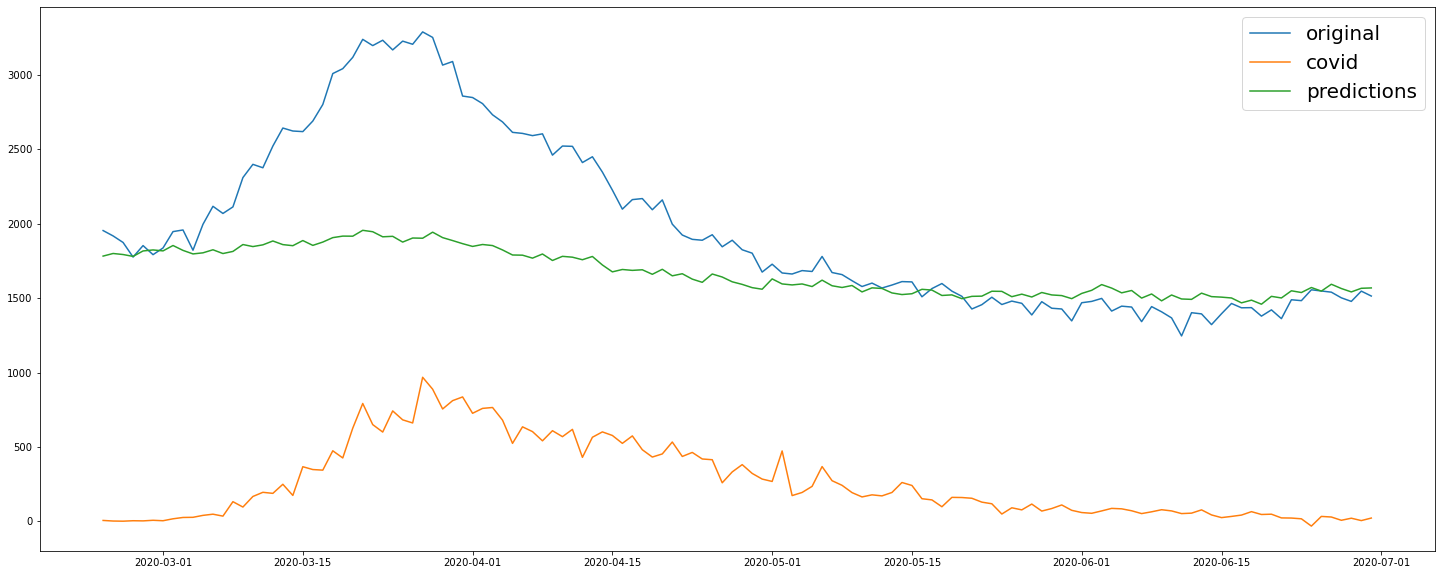

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))

plt.plot(ts_covid_period, label='original')
plt.plot(ts_decessi_covid, label='covid')
plt.plot(ts_predictions_covid_period, label='predictions')

plt.legend(prop={'size': 20})
plt.show()

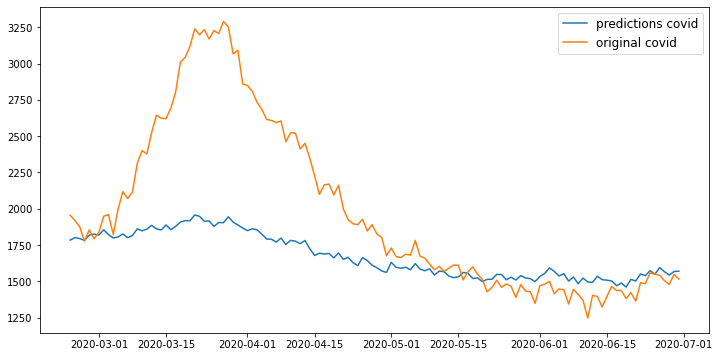

In [16]:
plt.figure(figsize=(12,6))

plt.plot(ts_predictions_covid_period, label='predictions covid')
plt.plot(ts_covid_period, label='original covid')
plt.legend(prop={'size': 12})
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a maggio
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a maggio 
</p>

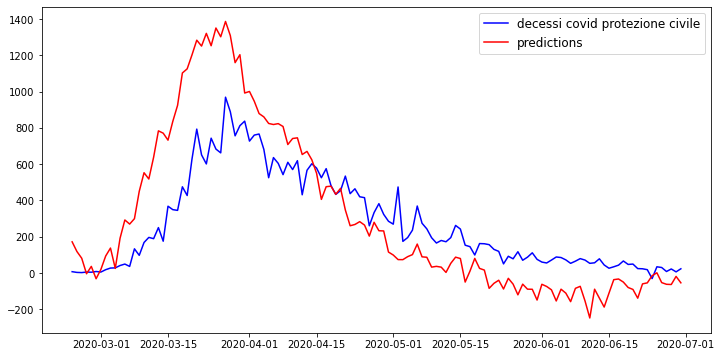

In [17]:
n = ts_covid_period - ts_predictions_covid_period 

plt.figure(figsize=(12,6))
plt.plot(ts_decessi_covid, color='blue', label='decessi covid protezione civile')
plt.plot(n, color='red', label='predictions')
plt.legend(prop={'size': 12})
plt.show()

In [18]:
total = n.sum()
print(int(total))

39191


<h5> Tolgo dal totale dei decessi registrati dall'ISTAT la predizione del modello e i decessi covid registrati dalla protezione civile </h5>

In [19]:
# numero di decessi non registrati
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

4424
